In [1]:
import os
import sys
import csv
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline


# for better visualization
sns.set(style="whitegrid")


In [2]:
# load the data
raw_data = pd.read_csv('responses.csv')
display(raw_data.head())

,Timestamp,"By selecting the ""I agree"" button option, you indicate that you have read the information provided above, that you voluntarily agree to participate in this study, and that you are at least 18 years of age.",What is your field of study?,"If you are pursuing an undergraduate degree, what year are you in? If you are pursuing graduate degree (including dual degree students) what is the degree you are pursuing? If you are a faculty, what is your position? \n\n(Please utilize ""Other..."" option and enter accordingly if there are no available options below or you are not clear about the options or you believe the options may not accurately reflect your response)",How would you rate your familiarity with LLMs?,How well do you trust LLM's?,"If you have any experience working with/using LLM, please list/describe any of them.","In what area do you think LLMs will be most used in the future? (e.g., education, healthcare, entertainment, programming, content generation, law etc.)",What specific tasks or functions do you envision LLMs being used for in that area in the future (other than those mentioned above)?,"Given your academic/professional background, what security vulnerabilities or privacy risks do you think might arise from the increased reliance on LLMs in everyday tasks and interactions in your field",...,Your Email,Are you willing to participate in 10 minutes virtual or in-person follow-up interview?,Your Name,What days and times are you free this week or next week?,"What is your field of study/major/profession?\n\n(Please utilize ""Other..."" option and enter accordingly if there are no available options below or you are not clear about the options or you believe the options may not accurately reflect your response)",vulnerable_encoding,tasks_encoding_positive_tasks,tasks_encoding_exploitative_tasks,tasks_encoding_effects,risks_encoding
0,3/25/2024 10:23:40,I agree,Engineering,Senior,5,3,utilizing ChatGPT， image generation service,healthcare,perform diagnosis and interact with patient,"untrustworthy information generation (code, fa...",...,NaN,No,NaN,NaN,NaN,"Software Development, Customer Service","Patient Diagnosis, Patient Interaction Analysis","Phishing, Spamming, Impersonation","Phishing, Spamming, Impersonation",NaN
1,3/25/2024 10:46:08,I agree,Engineering,Professor,10,1,Use them to understand LLMs so that I can carr...,Almost all aspects of life,Almost all aspects of life,A lot,...,umar.iqbal@wustl.edu,Yes,Umar Iqbal,Monday 12:30 to 1:30 or after class,NaN,NaN,All,A lot,A lot,NaN
2,3/25/2024 14:04:38,I agree,Arts and Science,Sophomore,3,5,"chatGPT, google translate",healthcare,"analyzing and communicating patient feedback,",people's private information being shared afte...,...,h.l.woodhouse@wustl.edu,Yes,Hannah Woodhouse,"Wednesday, Friday after 2:00, Tuesday Thursday...",NaN,Healthcare,Patient Interaction,Scamming,Scam calls,NaN
3,3/25/2024 14:24:00,I agree,Engineering,Junior,1,3,"Rare use of ChatGPT, frequent use of Google Tr...",Programming,"Debugging code, providing sample programs.",Negligence to verify sources of information\nU...,...,m.takato@wustl.edu,No,NaN,NaN,NaN,Education,Debugging Code,Scamming,"Usage of Unverfied sources, Data Harvesting, D...",NaN
4,3/26/2024 12:12:45,I agree,Engineering,Masters/Dual Degree,7,5,"I use a smart speaker at home, and ChatGPT eve...",I think healthcare will be a major area in whi...,I think they could be good for people who don'...,I think too much dependence on LLMs will lead ...,...,haffnerriley@wustl.edu,No,NaN,NaN,NaN,Marketing,Telehealth,"Hacking, Attacking other Models",Insecure code generation,NaN


In [3]:
# rename raw_data columns
new_columns = ['timestamp', 'field_of_study', 'education', 'familiarity', 'initial_trust', 'experience', 'future_area', 'future_tasks', 'reliance_risk', 'possible_exploitation', 'privacy_concern', 'other_risks', 'vulnerable_sector', 'interdisciplinary', 'fingerprint', 'comprehension_concern', 'final_trust', 'field_of_study.1', 'vulnerable_encoding', 'tasks_encoding_positive_tasks', 'tasks_encoding_exploitative_tasks', 'tasks_encoding_effects', 'risks_encoding']

# drop columns that are not needed
columns_to_drop = [
                    'By selecting the "I agree" button option, you indicate that you have read the information provided above, that you voluntarily agree to participate in this study, and that you are at least 18 years of age.', 
                   'Your Email',
                   'Are you willing to participate in 10 minutes virtual or in-person follow-up interview?', 
                   'Your Name',
                   'What days and times are you free this week or next week?',

                   ]
pp_data = raw_data.drop(columns=columns_to_drop)

# rename columns
pp_data.columns = new_columns

# merge field of study columns 
# accidentally deleted the first field of study in survey, so need to merge the two columns
pp_data['field_of_study'] = pp_data['field_of_study'].fillna(pp_data['field_of_study.1'])
pp_data = pp_data.drop(columns=['field_of_study.1'])
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
display(pp_data)

,timestamp,field_of_study,education,familiarity,initial_trust,experience,future_area,future_tasks,reliance_risk,possible_exploitation,privacy_concern,other_risks,vulnerable_sector,interdisciplinary,fingerprint,comprehension_concern,final_trust,vulnerable_encoding,tasks_encoding_positive_tasks,tasks_encoding_exploitative_tasks,tasks_encoding_effects,risks_encoding
0,3/25/2024 10:23:40,Engineering,Senior,5,3,utilizing ChatGPT， image generation service,healthcare,perform diagnosis and interact with patient,"untrustworthy information generation (code, fa...","phishing, spamming, impersonation",information leakage - no cache policy,unemployment,"SDE, customer service",companies have an incentive to disregard ethic...,"yes. Much like search engine, profiling would ...",NaN,3,"Software Development, Customer Service","Patient Diagnosis, Patient Interaction Analysis","Phishing, Spamming, Impersonation","Phishing, Spamming, Impersonation",NaN
1,3/25/2024 10:46:08,Engineering,Professor,10,1,Use them to understand LLMs so that I can carr...,Almost all aspects of life,Almost all aspects of life,A lot,A lot,A lot,A lot,A lot,A lot,A lot,A lot,1,NaN,All,A lot,A lot,NaN
2,3/25/2024 14:04:38,Arts and Science,Sophomore,3,5,"chatGPT, google translate",healthcare,"analyzing and communicating patient feedback,",people's private information being shared afte...,LLMs might have the potential to be very good ...,they may take in information about people's pe...,"in my field, data science, use of LLMs on data...","yes, I think healthcare may be because they ha...",a combined approach between many fields can mi...,"Yes, I think they should. I foresee many priva...",yes. I think that it may become harder to iden...,3,Healthcare,Patient Interaction,Scamming,Scam calls,NaN
3,3/25/2024 14:24:00,Engineering,Junior,1,3,"Rare use of ChatGPT, frequent use of Google Tr...",Programming,"Debugging code, providing sample programs.",Negligence to verify sources of information\nU...,More-sophisticated online scamming,"Jailbreaking, for the purpose of revealing pro...",Casual mistreatment of AI.\nAccidental use of ...,"Education, specifically any institution which ...",Monitor and prohibit use of data containing pe...,This question depends on the purpose of the LL...,Impersonation.\nNon-consensual fabrication of ...,2,Education,Debugging Code,Scamming,"Usage of Unverfied sources, Data Harvesting, D...",NaN
4,3/26/2024 12:12:45,Engineering,Masters/Dual Degree,7,5,"I use a smart speaker at home, and ChatGPT eve...",I think healthcare will be a major area in whi...,I think they could be good for people who don'...,I think too much dependence on LLMs will lead ...,"hacking a company, or using AI to attack other...",It could be using prompts to learn in bad ways...,People may lose their knowledge level for codi...,Marketing or telemarketing could be vulnerable...,Continue to conduct research and test differen...,I think it is possible for LLMs to be able to ...,I think using real people in images or audio a...,5,Marketing,Telehealth,"Hacking, Attacking other Models",Insecure code generation,NaN
5,3/27/2024 18:54:06,Arts and Science,Junior,1,5,Use google translate almost daily,Healthcare,Way to enter in all symptoms and find preceden...,False information about climate change,Political propaganda spreading false information,May collect data based on inquiries - provide ...,A large portion of my field has to do with hum...,Military,Many - no entity used for universal use can be...,No,Things could be taken out of context in a dang...,3,Military,Patient Diagnosis,"Generate Propaganda, Misinformation",Misinformation,NaN
6,3/27/2024 19:13:58,Nursing,Junior,4,3,ChatGPT,Any media such as films and commercials,Creating actors without actually hiring actors...,Creating fake evidence of a crime or using it ...,Using it to view people in vulnerable and inap...,They can pretend to be someone else to trick y...,Taking away jobs,Not sure,Find someone qualified enough to monitor all i...,

# Data Analysis

In [4]:
# Descriptive statistics
print("Descriptive Statistics:")
print(pp_data [['familiarity', 'initial_trust', 'final_trust']].describe())

# Calculating mode (note: mode could be multi-modal)
print("\nMode:")
print(pp_data [['familiarity', 'initial_trust', 'final_trust']].mode().head(1))



Descriptive Statistics:
       familiarity  initial_trust  final_trust
count    75.000000      75.000000    75.000000
mean      4.240000       4.853333     3.986667
std       2.335623       2.018116     2.010065
min       1.000000       1.000000     1.000000
25%       2.000000       3.000000     3.000000
50%       5.000000       5.000000     4.000000
75%       6.000000       6.000000     5.000000
max      10.000000      10.000000    10.000000

Mode:
   familiarity  initial_trust  final_trust
0          5.0            5.0            3


## Simple linear regression analysis to explore relationships between variables familiarity with LLMs and initial trust levels.

In [5]:
import statsmodels.api as sm

# Simple linear regression
X = sm.add_constant(pp_data['familiarity'])  # adding a constant
Y = pp_data['initial_trust']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          initial_trust   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.5310
Date:                Sat, 27 Apr 2024   Prob (F-statistic):              0.469
Time:                        12:16:29   Log-Likelihood:                -158.31
No. Observations:                  75   AIC:                             320.6
Df Residuals:                      73   BIC:                             325.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.5420      0.487      9.326      

### Response Analysis

From the OLS regression results, we can gather several insights:

1. **R-squared**: The R-squared value is 0.013, which indicates that only about 1.3% of the variation in initial trust levels is explained by the variation in familiarity with LLMs. This suggests that familiarity with LLMs alone does not strongly predict initial trust levels.

2. **Coefficient Estimates**: The coefficient for the variable "familiarity" is 0.0989. This suggests that for every one-unit increase in familiarity with LLMs, initial trust levels increase by approximately 0.0989 units. However, since the coefficient is not statistically significant (p-value = 0.324), we cannot conclude that this relationship is not likely due to random chance.

3. **Intercept**: The intercept (const) is 4.4704. This represents the estimated initial trust level when familiarity with LLMs is zero.

4. **Statistical Significance**: The p-values associated with the coefficient estimates provide information about their statistical significance. In this case, the p-value for the coefficient of "familiarity" is 0.324, which is greater than the typical significance level of 0.05. This suggests that familiarity with LLMs is not a statistically significant predictor of initial trust levels in this model.

5. **Model Fit**: The F-statistic is 0.9850 with a associated probability of 0.324. This suggests that the overall fit of the model is not statistically significant, further indicating that familiarity with LLMs alone may not be a strong predictor of initial trust levels.

6. **Assumptions**: The assumptions of linear regression (e.g., normality of residuals, homoscedasticity) should be assessed to ensure the validity of the model results.

In summary, based on these results, familiarity with LLMs does not appear to be a significant predictor of initial trust levels. Additional factors or a more complex model may be needed to better understand the determinants of initial trust in LLMs.

### lda word cloud

In [6]:
# analyze experience using scikit lda and visualize using wordcloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from wordcloud import WordCloud
from tokenizers import Tokenizer
from tokenizers.models import BPE
from transformers import PreTrainedTokenizerFast
import re, nltk, spacy, gensim
from transformers import AutoTokenizer



In [7]:
from spacy.lang.en import stop_words as stop_words

# remove NaN values
experience_data = pp_data['experience'].dropna()

# lowercase the data
experience_data = experience_data.str.lower()

# tokenize the data using spaCy
nlp = spacy.load('en_core_web_sm')
experience_data = experience_data.apply(lambda x: nlp(x))
# print(experience_data)

# remove stop words
experience_data = experience_data.apply(lambda x: [token for token in x if not token.is_stop])
# print(experience_data)

# remove special characters
experience_data = experience_data.apply(lambda x: [token for token in x if token.is_alpha])

# lemmatize the data
experience_data = experience_data.apply(lambda x: [token.lemma_ for token in x])




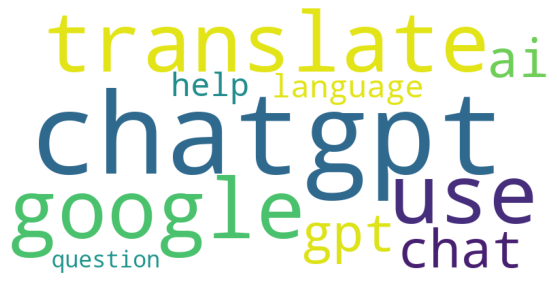

In [8]:
# lda
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(experience_data.apply(lambda x: ' '.join(x)))

lda_model = LDA(n_components=1, learning_method='online', random_state=0, n_jobs=-1)
lda_output = lda_model.fit_transform(data_vectorized)

# visualize lda
# get the feature names
words = vectorizer.get_feature_names_out()
# get the topic names
# topic_names = ['Topic' + str(i) for i in range(lda_model.n_components)]
# make the wordcloud
for i, topic in enumerate(lda_model.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([words[i] for i in topic.argsort()[:-10 - 1:-1]]))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    # plt.title('')
    plt.show()

## sentiment analysis on fingerprinting

In [9]:
# huggingface sentiment analysis on fingerprint

# load the sentiment analysis pipeline
sentiment_analysis = pipeline(model='nlptown/bert-base-multilingual-uncased-sentiment')

# analyze the fingerprint data
fingerprint_data = pp_data['fingerprint'].dropna()
fingerprint_data = fingerprint_data.to_list()
print(fingerprint_data)

# analyze the sentiment of the fingerprint data
sentiment_results = sentiment_analysis(fingerprint_data)
print(sentiment_results)




Downloading:   0%|          | 0.00/3.61k [00:00<?, ?B/s]

['yes. Much like search engine, profiling would be problematic.', 'A lot', 'Yes, I think they should. I foresee many privacy risks, as whoever owns the data for the LLM could see a lot of information about a person', 'This question depends on the purpose of the LLM.\nShould an LLM be trained on sensitive, private, confidential, or otherwise non-civilian information (ex. for government or internal corporate use), fingerprinting would be an effective security deterrent against misuse, and would provide accountability. \nHowever, for public LLMs, fingerprinting seems excessive. \nIn both cases, I believe any training of LLMs on fingerprint data is a terrible idea. ', 'I think it is possible for LLMs to be able to do this, however, I think that this presents multiple privacy concerns related to ads and tracking. ', 'No', 'No ', 'No. This is a huge risk to have such valuable personal identification stored into such a novel and complex platform that can be subject to abuse.', "doesn't matter

    label     score
0       3  0.483295
1       3  0.376295
2       4  0.346079
3       2  0.482752
4       3  0.540843
5       1  0.531922
6       1  0.531922
7       1  0.711263
8       3  0.468314
9       2  0.370232
10      1  0.853026
11      2  0.353402
12      2  0.418525
13      2  0.402200
14      3  0.539630
15      3  0.495082
16      1  0.421938
17      1  0.857431
18      1  0.531922
19      1  0.531922
20      1  0.531922
21      3  0.313697
22      2  0.357737
23      1  0.582546
24      3  0.478464
25      1  0.727320
26      1  0.531922
27      2  0.435160
28      5  0.379079
29      1  0.531922
30      3  0.353616
31      2  0.392857
32      1  0.531922
33      1  0.862827
34      3  0.609374
35      1  0.634931
36      3  0.254155
37      1  0.694097
38      5  0.317531
39      5  0.379079
40      1  0.582546
41      3  0.406282
42      1  0.582546
43      1  0.531922
44      3  0.524376
45      3  0.633228
46      3  0.514611
47      5  0.329108
48      1  0.531922


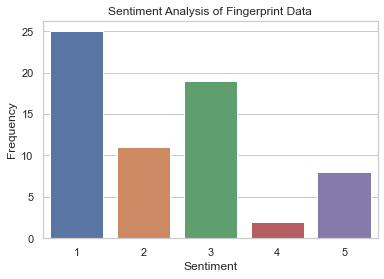

In [10]:
# visualize the sentiment of the fingerprint data
sentiment_results = pd.DataFrame(sentiment_results)
# change the 1 star to 1
sentiment_results['label'] = sentiment_results['label'].replace('1 star', 1)
# change the 2 star to 2
sentiment_results['label'] = sentiment_results['label'].replace('2 stars', 2)
# change the 3 star to 3
sentiment_results['label'] = sentiment_results['label'].replace('3 stars', 3)
# change the 4 star to 4
sentiment_results['label'] = sentiment_results['label'].replace('4 stars', 4)
# change the 5 star to 5
sentiment_results['label'] = sentiment_results['label'].replace('5 stars', 5)

print(sentiment_results)

# plot the sentiment of the fingerprint data
sns.countplot(x='label', data=sentiment_results)
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Sentiment Analysis of Fingerprint Data")

# show frequency of sentiment

plt.show()
# plt.title("Sentiment Analysis of Fingerprint Data")
# plt.show()


### familiarity and trust

In [11]:
# load initial trust and final trust data
initial_trust = pp_data['initial_trust']
initial_trust = initial_trust.dropna()
# load familiarity data
familiarity = pp_data['familiarity']
familiarity = familiarity.dropna()
# correlation between familiarity and initial trust
correlation = familiarity.corr(initial_trust, method='pearson')
print("Correlation between familiarity and initial trust: ", correlation)

# correlation between familiarity and final trust
final_trust = pp_data['final_trust']
final_trust = final_trust.dropna()
correlation = familiarity.corr(final_trust, method='pearson')
print("Correlation between familiarity and final trust: ", correlation)

# correlation between initial trust and final trust
correlation = initial_trust.corr(final_trust, method='pearson')
print("Correlation between initial trust and final trust: ", correlation)

# get the mean of initial trust
initial_trust_mean = pp_data['initial_trust'].mean()
print("Mean of initial trust: ", initial_trust_mean)

# get the median of initial trust
initial_trust_median = pp_data['initial_trust'].median()
print("Median of initial trust: ", initial_trust_median)

# get the mean of final trust
final_trust_mean = pp_data['final_trust'].mean()
print("Mean of final trust: ", final_trust_mean)

# get the median of final trust
final_trust_median = pp_data['final_trust'].median()
print("Median of final trust: ", final_trust_median)


Correlation between familiarity and initial trust:  0.08497625065211334
Correlation between familiarity and final trust:  0.2338435456938819
Correlation between initial trust and final trust:  0.7890264696195953
Mean of initial trust:  4.8533333333333335
Median of initial trust:  5.0
Mean of final trust:  3.986666666666667
Median of final trust:  4.0


### demographics of the participants


,field_of_study
0,Engineering
1,Engineering
2,Arts and Science
3,Engineering
4,Engineering
5,Arts and Science
6,Nursing
7,Chemistry
8,Computer Science
9,Arts and Science


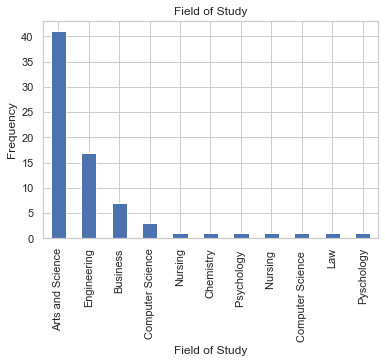

In [12]:
# field of study, education, familiarity, initial trust, and experience
# analyze field of study
field_of_study_data = pp_data['field_of_study'].dropna()
# do not truncate the data
field_of_study_data=pd.DataFrame(field_of_study_data)
pd.set_option('display.max_rows', None)

# display(field_of_study_data)

# merge psychology into arts and science
field_of_study_data['field_of_study'] = field_of_study_data['field_of_study'].replace('Psychology', 'Arts and Science')

# rename legal studies to law
field_of_study_data['field_of_study'] = field_of_study_data['field_of_study'].replace('Legal (practicing attorney)', 'Law')

display(field_of_study_data)
# plot using plt
field_of_study_data['field_of_study'].value_counts().plot(kind='bar')
plt.xlabel("Field of Study")
plt.ylabel("Frequency")
plt.title("Field of Study")
plt.show()


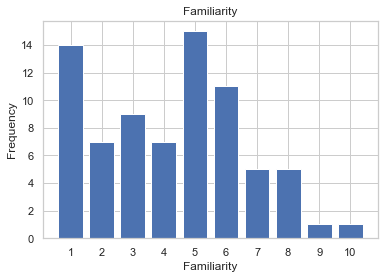

Mean of familiarity:  4.24
Median of familiarity:  5.0


In [13]:
# plot familiarity
familiarity_data = pp_data['familiarity'].dropna()
familiarity_data = familiarity_data.value_counts()
plt.bar(familiarity_data.index, familiarity_data.values)

# show all xticks
plt.xticks(familiarity_data.index)
plt.xlabel("Familiarity")
plt.ylabel("Frequency")
plt.title("Familiarity")
plt.show()

# get the mean of familiarity
familiarity_mean = pp_data['familiarity'].mean()
print("Mean of familiarity: ", familiarity_mean)

# get median of familiarity
familiarity_median = pp_data['familiarity'].median()
print("Median of familiarity: ", familiarity_median)

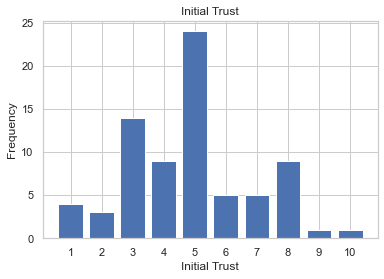

Mean of initial trust:  4.8533333333333335
Median of initial trust:  5.0


In [14]:
# analyze initial trust
initial_trust_data = pp_data['initial_trust'].dropna()
initial_trust_data = initial_trust_data.value_counts()
plt.bar(initial_trust_data.index, initial_trust_data.values)

# show all xticks
plt.xticks(initial_trust_data.index)
plt.xlabel("Initial Trust")
plt.ylabel("Frequency")
plt.title("Initial Trust")
plt.show()

# get the mean of initial trust
initial_trust_mean = pp_data['initial_trust'].mean()
print("Mean of initial trust: ", initial_trust_mean)

# get median of initial trust
initial_trust_median = pp_data['initial_trust'].median()
print("Median of initial trust: ", initial_trust_median)


In [15]:
# analyze experience

### testing tf idf method

In [51]:
# make a corpus for privacy concern
privacy_concern_data = pp_data['privacy_concern'].dropna()
privacy_concern_data = privacy_concern_data.str.lower()
privacy_concern_data = privacy_concern_data.str.split()
privacy_concern_data = privacy_concern_data.apply(lambda x: ' '.join(x))
privacy_concern_data = pd.DataFrame(privacy_concern_data)
pd.set_option('display.max_colwidth', None) 
display(privacy_concern_data)


,privacy_concern
0,information leakage - no cache policy
1,a lot
2,they may take in information about people's personal lives and accidentally share it later. i don't know what measures could be implemented to protect people's information
3,"jailbreaking, for the purpose of revealing proprietary information."
4,it could be using prompts to learn in bad ways that produce harmful outputs.
5,may collect data based on inquiries - provide warnings to users and educate students on ai use eariy
6,they can pretend to be someone else to trick you into giving information. measures could be whoever has created the llms must program them to able to recognize when someone is trying to manipulate it and give the user an error. terms and conditions could be set up and a real person could monitor conversations and flag anyone who tries to manipulate llms.
7,i think people put a blind trust in these programs which leaves them vulnerable to attacks like prompt interjection.
8,training on pii or being given access to pii for augmentation
9,"depending on the model, they could be hacked (?) which could compromise security. measures like human oversight could protect against this"


In [53]:
# tokenize the data using spaCy
nlp = spacy.load('en_core_web_sm')
privacy_concern_data_pp = privacy_concern_data['privacy_concern'].apply(lambda x: nlp(x))
# remove special characters
privacy_concern_data_pp = privacy_concern_data_pp.apply(lambda x: [token for token in x if token.is_alpha])
# remove stop words
privacy_concern_data_pp = privacy_concern_data_pp.apply(lambda x: [token for token in x if not token.is_stop])
# lemmatize the data
privacy_concern_data_pp = privacy_concern_data_pp.apply(lambda x: [token.lemma_ for token in x])
# aggregate everything into one list
privacy_concern_data_pp = privacy_concern_data_pp.sum()



print(privacy_concern_data_pp)

['information', 'leakage', 'cache', 'policy', 'lot', 'information', 'people', 'personal', 'life', 'accidentally', 'share', 'later', 'know', 'measure', 'implement', 'protect', 'people', 'information', 'jailbreake', 'purpose', 'reveal', 'proprietary', 'information', 'prompt', 'learn', 'bad', 'way', 'produce', 'harmful', 'output', 'collect', 'datum', 'base', 'inquiry', 'provide', 'warning', 'user', 'educate', 'student', 'ai', 'use', 'eariy', 'pretend', 'trick', 'give', 'information', 'measure', 'create', 'llm', 'program', 'able', 'recognize', 'try', 'manipulate', 'user', 'error', 'term', 'condition', 'set', 'real', 'person', 'monitor', 'conversation', 'flag', 'try', 'manipulate', 'llm', 'think', 'people', 'blind', 'trust', 'program', 'leave', 'vulnerable', 'attack', 'like', 'prompt', 'interjection', 'training', 'pii', 'give', 'access', 'pii', 'augmentation', 'depend', 'model', 'hack', 'compromise', 'security', 'measure', 'like', 'human', 'oversight', 'protect', 'share', 'private', 'inform

In [54]:
# use tf-idf to analyze the data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


# use tf-idf to analyze the data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(privacy_concern_data_pp)
# get idf values
print('\nidf values:')
feature_names = tfidf_vectorizer.get_feature_names_out()
for ele1, ele2 in zip(feature_names, tfidf_vectorizer.idf_):
    print(ele1, ':', ele2)




idf values:
ability : 6.634789603169249
able : 5.718498871295094
abt : 6.634789603169249
access : 5.718498871295094
accidentally : 6.2293244950610855
account : 6.634789603169249
accurate : 6.634789603169249
actor : 6.634789603169249
add : 6.634789603169249
advise : 6.634789603169249
aggregate : 6.634789603169249
agreement : 6.634789603169249
ai : 5.941642422609304
allow : 6.2293244950610855
answer : 6.634789603169249
art : 6.634789603169249
artist : 6.634789603169249
ask : 6.2293244950610855
assistant : 6.634789603169249
attack : 6.2293244950610855
augmentation : 6.634789603169249
automatically : 6.634789603169249
avoid : 6.2293244950610855
awareness : 6.634789603169249
bad : 6.2293244950610855
ban : 6.634789603169249
base : 6.2293244950610855
behavior : 6.634789603169249
big : 6.634789603169249
birthday : 6.634789603169249
bit : 6.634789603169249
blind : 6.634789603169249
breach : 6.634789603169249
breaker : 6.634789603169249
cache : 6.634789603169249
capable : 6.634789603169249
care

In [55]:
# get tf values
print('\ntf values:')
for ele1, ele2 in zip(feature_names, tfidf_matrix.toarray()[0]):
    if ele2 != 0:
        print(ele1, ':', ele2)




tf values:
information : 1.0


In [57]:
# count the frequency of each word
from collections import Counter
word_freq = Counter(privacy_concern_data_pp)
print('\nword frequency:')
print(word_freq)

# get the most common words
print('\nmost common words:')
print(word_freq.most_common(10))



word frequency:
Counter({'information': 37, 'llm': 30, 'user': 20, 'datum': 15, 'use': 12, 'people': 11, 'personal': 11, 'sensitive': 9, 'security': 7, 'private': 7, 'think': 6, 'model': 6, 'leak': 6, 'protect': 5, 'sure': 5, 'risk': 5, 'interview': 5, 'share': 4, 'measure': 4, 'prompt': 4, 'way': 4, 'able': 4, 'person': 4, 'like': 4, 'access': 4, 'privacy': 4, 'know': 3, 'implement': 3, 'collect': 3, 'provide': 3, 'ai': 3, 'give': 3, 'create': 3, 'manipulate': 3, 'training': 3, 'compromise': 3, 'password': 3, 'sell': 3, 'train': 3, 'server': 3, 'company': 3, 'steal': 3, 'pose': 3, 'input': 3, 'history': 3, 'lot': 2, 'life': 2, 'accidentally': 2, 'bad': 2, 'base': 2, 'student': 2, 'program': 2, 'try': 2, 'condition': 2, 'conversation': 2, 'attack': 2, 'pii': 2, 'hack': 2, 'human': 2, 'avoid': 2, 'expose': 2, 'exploit': 2, 'question': 2, 'allow': 2, 'help': 2, 'prevent': 2, 'certain': 2, 'ask': 2, 'government': 2, 'restrict': 2, 'gpt': 2, 'secure': 2, 'public': 2, 'voice': 2, 'thing': 

In [34]:
# use k-means to cluster the data
kmeans = KMeans(n_clusters=3).fit(tfidf_matrix)
clusters = kmeans.labels_

# get the top terms
terms = tfidf_vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(len(kmeans.cluster_centers_)):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Cluster 0:
 information
 llms
 sensitive
 user
 data
 personal
 use
 private
 people
 users
Cluster 1:
 using
 sure
 llm
 lot
 sell
 data
 na
 use
 avoid
 privacy
Cluster 2:
 interview
 written
 harmful
 giving
 government
 gpt
 hacked
 hackers
 hardware
 help


In [ ]:
# topic modeling for privacy_concern_data using 


### categorization

In [58]:
from nltk.tokenize import word_tokenize


In [60]:
# 'vulnerable_encoding', 'positive_tasks_encoding', 
#     'exploitative_tasks_encoding', 'effects_encoding', 'risks_encoding'
# Splitting comma-separated entries and counting
category_counter = Counter()

def preprocess(text):
    if pd.isna(text) or text.strip() == "":
        return None  # Return None to indicate invalid or empty entry
    text = text.strip().lower()
    replacements = {
        'performe routine tasks': 'perform routine tasks',
        'tasks organization': 'task organization',
        'peform routine tasks': 'perform routine tasks',
        'fiancial models': 'financial models',  
        'government': 'in the government', 
        'writing code': 'coding', 'personalized ads': 'personalized advertising', 'personal advertising': 'personalized advertising' 
    }
    for key, value in replacements.items():
        text = text.replace(key, value)
    return text

# Splitting comma-separated entries and counting
category_counter = Counter()
for entry in pp_data['positive_tasks_encoding']:
    if pd.notna(entry):  # Only process if entry is not NaN
        categories = entry.split(',')
        categories = [preprocess(cat) for cat in categories if preprocess(cat)]
        category_counter.update(categories)

# Converting counter to DataFrame for display
category_df = pd.DataFrame(category_counter.items(), columns=['Category', 'Frequency'])
category_df = category_df.sort_values(by='Frequency', ascending=False)
print(category_df)

# Optionally, you can generate a word cloud to visualize the frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_counter)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

KeyError: 'positive_tasks_encoding'

In [ ]:
tasks_categories = {
    'healthcare': [
        'patient diagnosis', 'telehealth', 'diagnose patients', 'analyzing medical scans', 'virtual therapist',
        'patient interaction', 'patient interaction analysis', 'medical tasks'
    ],
    'software development': [
        'debugging code', 'writing code', 'generating code', 'automated writing', 'creating models', 'adaptive programming assistance',
        'code generation', 'migrating legacy codebase', 'coding', 'software tasks', 'advanced code generation'
    ],
    'research and development': [
        'research synthesis', 'research assistance', 'mapping tumors', 'targeted research', 'research', 'building financial models and financial research'
    ],
    'education and training': [
        'content generation', 'create lesson plans', 'homework assistance',
        'study aide', 'teaching', 'educational tasks', 'training tasks'
    ],
    'legal and compliance': [
        'legal research', 'legal tasks', 'compliance tasks'
    ],
    'marketing and advertising': [
        'personal advertising', 'targeted advertising', 'personalized ads', 'personalized advertising', 'marketing tasks', 
    ],
    'public service and governance': [
        'city planning', 'in the government', 'public governance', 'government tasks'
    ],
    'content generation': [
        'generating animations',  'content generation','content creation', 'generating content', 'music generation',
        'generate movie scripts', 'creating architectural plans', 'creative tasks'
        'automated writing', 'news article generation', 'speech writing', 'translating','language translation' 'creating kids bedtime stories', 'generating lesson plans', 'generating movie scripts', 'generating workout plans','generating content', 'content creation', 'generate movie scripts', 'generating animations', 'creating architectural plans'
    ],
    'administrative tasks':['building financial models and financial research, candidate screening, customer service','summarizations', 'scheduling', 'task summarization', 'tasks oraganization', 'perform routine tasks', 'performoning routine tasks'],
    'other': []
    
}

# Map each category to its corresponding main category
category_df['Main Category'] = category_df['Category'].apply(lambda x: map_category_to_main(x, tasks_categories))

# Aggregate frequencies by main categories
final_counts = category_df.groupby('Main Category').agg({
    'Frequency': 'sum',
    'Category': lambda x: ', '.join(sorted(set(x)))  # Collect unique subcategories
}).reset_index()

# Calculate total percentages
total_frequency = final_counts['Frequency'].sum()
final_counts['Percent'] = (final_counts['Frequency'] / total_frequency * 100).round(2)

# Print the final categorized DataFrame
# print(final_counts)

styled_table = style_table(final_counts, " future llm tasks ")
display(styled_table)

